C:\Users\ipacs\AppData\Local\Temp/ipykernel_23656/36226066.py:24: RuntimeWarning: invalid value encountered in true_divide
  fractional_error = np.abs(approxvals - truevals) / (np.abs(truevals))


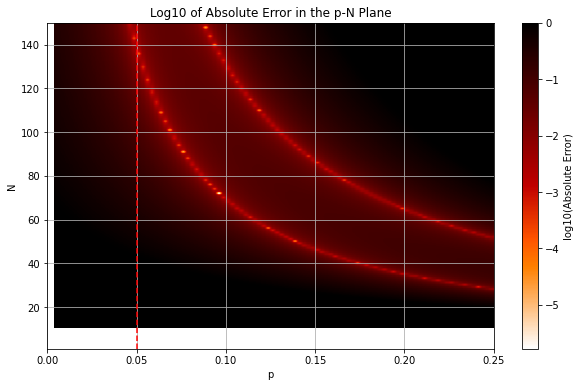

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Let us define the distributions
def binom(n, k, p):
    return np.where(k > n, 0, comb(n, k) * (p ** k) * ((1 - p) ** (n - k)))

def poiss(n, k, p):
    return np.where(k > n, 0, (n * p) ** k / np.math.factorial(k) * np.exp(-n * p))

# Creating a grid
pvals = np.linspace(0, 0.25, 100)
Nvals = np.arange(1, 151)

P, N = np.meshgrid(pvals, Nvals)
k = 10

# Vectorize the binom() and poiss() functions using NumPy's vectorized operations
truevals = binom(N, k, P)
approxvals = poiss(N, k, P)

# Finding the fractional error
fractional_error = np.abs(approxvals - truevals) / (np.abs(truevals))

# Calculate log10 of the absolute error
log10_abs_error = np.where(fractional_error == 0, 0,np.where(fractional_error >1, 0, np.log10(fractional_error)))


plt.figure(figsize=(10, 6))
plt.imshow(log10_abs_error, origin='lower', extent=[0, 0.25, 1, 150], aspect='auto', cmap='gist_heat_r')
plt.colorbar(label='log10(Absolute Error)')
plt.xlabel('p')
plt.ylabel('N')
plt.title('Log10 of Absolute Error in the p-N Plane')
plt.grid(True)
plt.axvline(x=0.05, color='red', linestyle='--')
plt.show()
